## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 INF8460 <br>  Automne 2022 </center>

## 1. DESCRIPTION
Dans ce TP, l’idée est d'utiliser un système de traduction automatique pour générer des requêtes de base de connaissances en SPARQL à partir de questions en langage naturel.

Les bases de connaissances sont une source de données structurées, selon les standards, modèles et langages du Web sémantique, qui permettent un accès efficace à une grande quantité d'information dans des domaines très variés. Cependant, leur accès est limité par la complexité des requêtes qui ne permet pas au public de s'en servir. Un système de traduction automatique pourrait permettre de générer automatiquement une requête étant donnée une question formulée par un usager en langage naturel.

Dans notre cas, la langue d’entrée sera l’anglais et le langage de requête sera SPARQL (https://www.w3.org/TR/sparql11-query/). Afin de faciliter le travail du modèle, nous vous fournissons une version modifiée des questions dans laquelle certains mots sont remplacés par leur équivalent que l’on retrouve dans la requête.

Voici un exemple : <br>

__Question originale :__ _In how many other states do people live, whose languages are spoken in apocalypto?_

__Entrée : Question taggée :__ _In how many other dbp:region do people live, whose dbo:language are spoken in dbr:Apocalypto?_

__Sortie attendue : Requête:__ _select distinct count ( ?uri ) where { dbr:Apocalypto dbo:language ?x . ?x dbp:region ?uri }_

(Cette demande revoie à la partie suivant de la base de connaissance DBPedia:

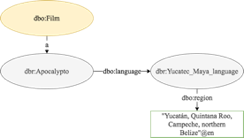

dbr:Apocalypto a dbo:Film . <br>
dbr:Apocalypto dbo:language dbr:Yucatec_Maya_language .  <br>
dbr:Yucatec_Maya_language dbp:region "Yucatán, Quintana Roo, Campeche, northern Belize"@en . )

__Réponse : 1__

## 2. LIBRARIES PERMISES
- Numpy
- Pandas
- HuggingFace
- Keras
- NLTK
- SPACY
- Pytorch
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

## 3. INFRASTRUCTURE

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

## 4. ECHÉANCE 

- Fin de la session. La date précise sera indiquée sur Moodle.


## 5. KAGGLE
 
Le TP4-projet se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos modèles.  
Pour tester votre système au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Vous verrez deux types de résultats sur votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de donnée pour tous les participants. 
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle). _tp4_submission.csv_ devra contenir pour chaque ligne de votre ensemble de test, la requête retournée par votre approche, selon le format indiqué dans la compétition.



## 6. DESCRIPTION DES DONNEES ET METRIQUES D’EVALUATION

Le corpus est un corpus de 5 000 paires de questions - requêtes sur DBPedia portant sur une grande variété de thèmes plus ou moins spécifiques. Trois documents sont fournis :

-	Les 4000 paires de questions – requêtes d’entrainement dans un fichier train.csv.
-	Les 500 paires de questions – requêtes de validation dans un fichier validation.csv.
-	Les 500 questions de test pour lesquelles vous devez générer des requêtes SPARQL dans un fichier test.csv.

La sortie de votre modèle sera comparée à notre ensemble de référence. Vous serez évalués en utilisant la métrique « accuracy » sur les requêtes prédites par vos modèles dans la compétition Kaggle. Cette métrique vérifie pour chaque requête prédite par votre modèle si elle est exactement égale à la requête attendue. Faite donc bien attention aux requêtes générées : un seul caractère non correct fait compter la requête comme fausse. 

Nous vous demandons également de rapporter, dans votre notebook uniquement, la métrique BLEU de votre modèle sur l’ensemble de validation. Cette métrique est très utilisée dans les tâches de traduction automatique et nous vous fournissons une fonction qui la calcule. Pour plus d’information voir https://en.wikipedia.org/wiki/BLEU. 

## 7. ETAPES DU TP 

A partir de ce notebook squelette, vous devez réaliser les étapes suivantes. (Notez que les cellules dans le squelette sont là à titre informatif il est fort probable que vous rajoutiez des sections au fur et à mesure de votre TP).


### 7.1. Etat de l’art (5%)
 
Décrivez en __deux paragraphes__, dans une cellule du notebook, avec les références appropriées, les architectures de l’état de l’art pour la génération de requêtes SPARQL. Utilisez le service Google Scholar. Voici quelques mots-clés : Neural Machine Translation SPARQL, SPARQL Sequence to Sequence Model, etc.

En vous basant sur vos recherches et sur cet article, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention à comparer des approches sur les mêmes jeux de données et en utilisant les mêmes métriques dans votre analyse.



Pour notre recherche nous avons étudié l'article initulé "Neural machine translating from natural language to SPARQL" de Xiaoyu Yin, Dagmar Gromann et Sebastian Rudolph [1]. Les chercheurs ont étudié la traduction automatique de l'anglais vers le langage SPARQL. Ils ont comparé 8 architectures différentes : NSpM, NSpM+Att1, NSpM+Att2,GNMT-4, GNMT-8, LSTM_Luong, ConvS2S et Transformer. 
Le NSpM est une architecture generator–learner–interpreter. 
Le générateur prend des modèles de requête comme entrée et crée l'ensemble de données d'entrainement, qui est transmis au learner.
Le learner prend le langage naturel comme entrée et génère une séquence
qui encode une requête SPARQL. Ensuite un RNN encodeur-décodeur est employé comme traducteur séquentiel [2]. Le modèle est amélioré avec un phénomène d'attention globals Att1 et locals Att2.
Le LSTM_Luong combine l'architecture LSTM et les phénomènes d'attention [3]. Le GNMT utilise des connexions résiduelles pour remédier
la perte d’information causée par les nombreuses couches.De plus, GNMT utilise un RNN bidirectionnel sur la première couche de l’encodeur. GNMT-4 possède 4 couches et GNMT-8, 8 couches [4]



L'article présente une comparaison des modèles avec la métrique BLEU (p 517). On observe que les deux meilleures techniques sont le ConvSeq2Seq puis le Transformer. Nous allons donc nous intéresser à ces modèles. 
L'architectures du Transformer est présentée dans la partie 7.2.1  et l'architecture du ConvSeq2Seq dans la partie 7.3. 

Références :  
[1] X. Yin, D. Gromann, S. Rudolph, Neural machine translating from natural language to SPARQL

[2]  T. Soru, E. Marx, A. Valdestilhas, D. Esteves, D. Moussallem, G. Publio,
Neural machine translation for query construction and composition, CoRR
abs/1806.10478 (2018) arXiv:1806.10478.

[3] T. Luong, H. Pham, C.D. Manning, Effective approaches to attentionbased neural machine translation, in: L. Màrquez, C. Callison-Burch, J.
Su, D. Pighin, Y. Marton (Eds.), Proceedings of the 2015 Conference on
Empirical Methods in Natural Language Processing, EMNLP, ACL, 2015, pp.
1412–1421, http://dx.doi.org/10.18653/v1/D15-1166.

[4] Y. Wu, M. Schuster, Z. Chen, Q.V. Le, M. Norouzi, W. Macherey, M. Krikun,
Y. Cao, Q. Gao, K. Macherey, J. Klingner, A. Shah, M. Johnson, X. Liu, L.
Kaiser, S. Gouws, Y. Kato, T. Kudo, H. Kazawa, K. Stevens, G. Kurian, N. Patil,
W. Wang, C. Young, J. Smith, J. Riesa, A. Rudnick, O. Vinyals, G. Corrado,
M. Hughes, J. Dean, Google’s neural machine translation system: Bridging
the gap between human and machine translation, CoRR abs/1609.08144
(2016) arXiv:1609.08144.

### 7.2. Méthodologie
#### 7.2.1. Architecture proposée (5%)

Proposez une architecture d'encodeur-décodeur non pré-entrainée de type Transformer ou CNN pour la tâche. Décrivez l’architecture et la méthodologie en quelques lignes dans une cellule de texte.

Pour la première partie nous avons choisi de proposer une architecture de Transfomer. 

Le Transformer est un encoder-décoder avec pour chaque bloc une enchainement de couches d'auto-attention et de réseaux de neurones entièrements connectés. Les blocs des décodeurs ont également une couche encodeur-décodeur attention dont les matrices key et value sont issues de la sortie de l'encodeur pour définir l'attention. 


Avant l'entrée dans le modèle nous allons faire un pré-traitement de notre corpus et nous allons le segmenter à l'aide des Tokenizer de Spacy. 
Pour la préparation des séquences des batchs avant d'entrer dans le modèle nous allons inclure des pads pour que les séquences soient de même longueur. Ces pads seront masqués pour indiquer au modèle de les ignorer

[5]  A. Vaswani, N. Shazeer, N. Parmar, J. Uszkoreit, L. Jones, A.N. Gomez, L.
Kaiser, I. Polosukhin, Attention is all you need, in: I. Guyon, U. von Luxburg,
S. Bengio, H.M. Wallach, R. Fergus, S.V.N. Vishwanathan, R. Garnett (Eds.),
Advances in Neural Information Processing Systems 30, Curran Associates,
Inc., 2017, pp. 5998–6008.

#### 7.2.2. Mise en place (45%)

Mettez en place la solution proposée dans la partie précédente. 

#### Imports

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

!python3 -m spacy download en > /dev/null
!pip install torchinfo > /dev/null
!pip install einops > /dev/null
!pip install -U spacy
!python -m spacy download en_core_web_sm

from itertools import takewhile
from collections import Counter, defaultdict

from sklearn.model_selection import train_test_split

import torch.optim as optim
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vocab

import einops
from torchinfo import summary

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
PATH = ""

In [ ]:
train=pd.read_csv(PATH+"train.csv")
test=pd.read_csv(PATH+"test.csv")
validation=pd.read_csv(PATH+"validation.csv")

In [ ]:
train.head()

,id,english,sparql
0,0,how many movies are there whose dbo:director i...,select distinct count ( ?uri ) where { ?uri db...
1,1,what dbo:City 's dbo:founder is dbr:John_Forbe...,select distinct ?uri where { ?uri dbo:founder ...
2,2,what is the dbo:River whose dbo:riverMouth is ...,select distinct ?uri where { ?uri dbo:riverMou...
3,3,what is the dbp:allegiance of dbr:John_Kotelaw...,select distinct ?uri where { dbr:John_Kotelawa...
4,4,what is the total number of dbp:race of the ra...,select distinct count ( ?uri ) where { ?x dbo:...


#### Preprocessing

In [ ]:
#Pour le préprocess de nos corpus nous nous sommes apperçus qu'avec SPARQL on retrouve beaucoup des tokens de la forme ?uri et dbr: ou dbo: avec des ponctuations collés à des caractères
#Nos modèles avait des difficultés à traiter ces formes donc nous ajoutons des espaces pour traiter ce soucis entre les ":" et les"?" pour l'ensemble de nos corpus


def preprocess(sentence):

  sentence = sentence.replace(':',' : ')
  sentence = sentence.replace('?','? ')
  return sentence



In [ ]:
# # On applique la fonction preprocess à nos données

train['english']=train['english'].apply(preprocess)
test['english']=test['english'].apply(preprocess)
validation['english']=validation['english'].apply(preprocess)
validation['sparql']=validation['sparql'].apply(preprocess)
train['sparql'] = train['sparql'].apply(preprocess)

#### Create Dataset PyTorch

In [ ]:
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vocab
from torch.utils.data.dataset import Dataset
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import DataLoader
from torchtext.vocab import build_vocab_from_iterator
import torchtext.datasets as datasets
from os.path import exists
import spacy
from torchtext.vocab import vocab

#Ajout de jetons spéciaux <unk> pour les mots inconnus, <pad> pour le padding, <bos> pour les débuts de séquences, <bos> pour les fins de séquences
SPECIALS = ['<unk>', '<pad>', '<bos>', '<eos>']

#Get english and sparql tokenizer with spacy
en_tokenizer = get_tokenizer('spacy', language='en_core_web_sm')


sparql_tokenizer = get_tokenizer('spacy', language='en_core_web_sm')

class TranslationDataset(Dataset):
    def __init__(
            self,
            dataset,
            en_vocab: Vocab,
            sparql_vocab: Vocab,
            en_tokenizer, 
            sparql_tokenizer
        ):
        super().__init__()



        self.dataset = dataset
        self.en_vocab = en_vocab
        self.sparql_vocab = sparql_vocab
        self.en_tokenizer = en_tokenizer
        self.sparql_tokenizer = sparql_tokenizer
    
    def __len__(self):

        return len(self.dataset)

    def __getitem__(self, index: int) -> tuple:

        # Get english and sparql sentence
        en_sentence, sparql_sentence = self.dataset.iloc[index,1], self.dataset.iloc[index,2]

        # We also add the beggining-of-sentence and end-of-sentence tokens
        en_tokens = ['<bos>'] + self.en_tokenizer(en_sentence) + ['<eos>']
        sparql_tokens = ['<bos>'] + self.sparql_tokenizer(sparql_sentence) + ['<eos>']

        # To list of tokens
        en_tokens = self.en_vocab(en_tokens)  
        sparql_tokens = self.sparql_vocab(sparql_tokens)

        return torch.LongTensor(en_tokens), torch.LongTensor(sparql_tokens)


  

#Function to build english and sparql vocabulary
def build_voc(document, min_freq, specials):

    voc = {}
    for _, row in document.iterrows():
      for word in row['english'].split(' '):
        if word not in voc:
            voc.update({word :  1})
        else:
            voc[word] += 1
    
    dictio_eng =  {key:voc[key] for key in voc if voc[key] >= min_freq}

    vocab_en = vocab(dictio_eng, min_freq = min_freq, specials = specials)

    voc = {}
    for idx, row in document.iterrows():
      for word in row['sparql'].split(' '):
        if word not in voc:
            voc.update({word :  1})
        else:
            voc[word] += 1

    dictio_sparql =  {key:voc[key] for key in voc if voc[key] >= min_freq}
    vocab_sparql = vocab(dictio_sparql, min_freq = min_freq, specials = specials)
    
    vocab_en.set_default_index(vocab_en['<unk>']) 
    vocab_sparql.set_default_index(vocab_sparql['<unk>']) 

    return vocab_en, vocab_sparql

#Build datasets
def build_datasets(
        max_sequence_length: int,
        min_token_freq: int,
        en_tokenizer,
        sparql_tokenizer,
        train,
        dataset
    ) -> tuple:

    datasets = [
        samples for samples in [train, dataset[0], dataset[1]]
    ]

    en_vocab, sparql_vocab = build_voc(train, min_token_freq, SPECIALS)

    datasets = [
        TranslationDataset(samples, en_vocab, sparql_vocab, en_tokenizer, sparql_tokenizer)
        for samples in datasets
    ]

    return datasets



In [ ]:
# Instanciate the datasets

MAX_SEQ_LEN = 128
MIN_TOK_FREQ = 1
train_dataset,val_dataset, test_dataset= build_datasets(
    MAX_SEQ_LEN,
    MIN_TOK_FREQ,
    en_tokenizer,
    sparql_tokenizer,
    train=train,
    dataset=[validation, test])

train_voc_en=train_dataset.en_vocab
train_voc_sparql=train_dataset.sparql_vocab

print(f'English vocabulary size: {len(train_dataset.en_vocab):,}')
print(f'SPARQL vocabulary size: {len(train_dataset.sparql_vocab):,}')

print(f'\nTraining examples: {len(train_dataset):,}')
print(f'Validation examples: {len(val_dataset):,}')
print(f'Test examples: {len(test_dataset):,}')

English vocabulary size: 4,235
SPARQL vocabulary size: 4,023

Training examples: 4,000
Validation examples: 500
Test examples: 500


#### Model Transformer

In [ ]:
#Structure du modèle Transformer
from torch.autograd import Variable

class Transformer(nn.Module):

    def __init__(
            self,
            n_tokens_src: int,
            n_tokens_tgt: int,
            n_heads: int,
            dim_embedding: int,
            dim_hidden: int,
            n_layers: int,
            dropout: float,
            src_pad_idx: int,
            tgt_pad_idx: int,
        ):
        super(Transformer,self).__init__()
        self.n_tokens_src=n_tokens_src
        self.n_tokens_tgt=n_tokens_tgt
        self.n_heads=n_heads
        self.dim_embedding=dim_embedding
        self.dim_hidden=dim_hidden
        self.n_layers=n_layers
        self.dropout=dropout
        self.src_pad_idx=src_pad_idx
        self.tgt_pad_idx=tgt_pad_idx

        self.dropoutfct=nn.Dropout(p=dropout, inplace=False)
        self.embedsrc=nn.Embedding(num_embeddings=n_tokens_src,embedding_dim=dim_embedding,padding_idx=src_pad_idx)
        self.embedtgt=nn.Embedding(num_embeddings=n_tokens_tgt,embedding_dim=dim_embedding,padding_idx=tgt_pad_idx)

        self.transfct=nn.Transformer(self.dim_embedding,self.n_heads,self.n_layers,self.n_layers,self.dim_hidden,self.dropout,batch_first=True)

        self.lin = nn.Linear(self.dim_embedding,self.n_tokens_tgt)



    def forward(
            self,
            source: torch.LongTensor,
            target: torch.LongTensor
        ) -> torch.FloatTensor:

        #On applique embedding
        batch_size=source.shape[0]
        src_seq_len=source.shape[1]

        src_embed=self.embedsrc(source)
        tgt_embed=self.embedtgt(target)

        input_size=src_embed.shape[2]
        

        #On implémente l'encodage de position
        max_len=5000
        d_model=self.dim_embedding
        pe = torch.zeros(max_len, d_model).to(source.device)
        position = torch.arange(0, max_len).unsqueeze(1).to(source.device)
        div_term = torch.exp(torch.arange(0, d_model, 2) *(-np.log(10000.0) / d_model)).to(source.device)
        pe[:, 0::2] = torch.sin(position * div_term).to(source.device)
        pe[:, 1::2] = torch.cos(position * div_term).to(source.device)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

        src =src_embed+ Variable(pe[:, :src_embed.shape[1]], requires_grad=False)
        src=self.dropoutfct(src)

        tgt =tgt_embed+ Variable(pe[:, :tgt_embed.shape[1]], requires_grad=False)
        tgt=self.dropoutfct(tgt)


        #On crée les masques
        N,trg_len=target.shape
        N,src_len=source.shape
        tgt_mask_attn = torch.triu(torch.ones((trg_len,trg_len),dtype=torch.bool),diagonal=1).to(source.device)
        tgt_key_paddig_mask=(target == self.tgt_pad_idx).to(source.device)
        src_key_paddig_mask=(source == self.src_pad_idx).to(source.device)


        #On applique le tranformer
        y=self.transfct(src,tgt,tgt_mask=tgt_mask_attn,src_key_padding_mask=src_key_paddig_mask,tgt_key_padding_mask=tgt_key_paddig_mask)

        lin=self.lin.to(source.device)
        y=lin(y).to(source.device)
  

        return y




#### Fonctions pour l'entrainement et l'évaluation

In [ ]:
 
import einops
from torchinfo import summary
from sklearn.metrics import accuracy_score

def accuracy_fct(
        real_tokens: torch.FloatTensor,
        probs_tokens: torch.FloatTensor,
        tgt_pad_idx: int,
    ) -> torch.FloatTensor:

    total = (real_tokens != tgt_pad_idx).sum()

    _, pred_tokens = probs_tokens.topk(k=1, dim=-1)  
    real_tokens = einops.repeat(real_tokens, 'b -> b k', k=1) 

    # Calcule de l'accuracy avec prise en compte des pads
    good = (pred_tokens == real_tokens) & (real_tokens != tgt_pad_idx)
    acc = good.sum() / total
    return acc


def loss_batch(
        model: nn.Module,
        source: torch.LongTensor,
        target: torch.LongTensor,
        config: dict,
    )-> dict:

    device = config['device']
    loss_fn = config['loss'].to(device)

    source, target = source.to(device), target.to(device)
    target_in, target_out = target[:, :-1], target[:, 1:]

    # Prédiction avec notre modèle
    pred = model(source, target_in)
    pred = pred.view(-1, pred.shape[2])  
    target_out = target_out.flatten()  

    #Calcul de la loss et de l'accuracy
    loss = loss_fn(pred, target_out)
    accuracy=accuracy_fct(target_out, pred,config['tgt_pad_idx'])

    return loss,accuracy


def eval_model(model: nn.Module, dataloader: DataLoader, config: dict) -> dict:
    """Evaluer le modèle sur le dataset donné
    """
    device = config['device']

    model.to(device)
    model.eval()

    loss_tot=0
    accuracy_tot=0
    cnt=0

    with torch.no_grad():
        for source, target in dataloader:
            cnt+=1
            loss, accuracy = loss_batch(model, source, target, config)
            loss_tot+=loss
            accuracy_tot+=accuracy

    loss_mean=loss_tot/cnt
    accuracy_mean=accuracy_tot/cnt

    return loss_mean,accuracy_mean
  

def train_model(model: nn.Module, config: dict):
  
    train_loader, val_loader = config['train_loader'], config['val_loader']
    train_dataset, val_dataset = train_loader.dataset.dataset, val_loader.dataset.dataset
    optimizer = config['optimizer']
    device = config['device']

    for e in range(config['epochs']):
        print(f'\nEpoch {e+1}')

        model.to(device)
        model.train()

        loss_train_tot=0
        accuracy_train_tot=0
        loss_eval_tot=0
        accuracy_eval_tot=0

        nb_batchs=0
        for batch_id, (source, target) in enumerate(train_loader):
          nb_batchs+=1

          optimizer.zero_grad()
          loss_train,accuracy_train = loss_batch(model, source, target, config)

          loss_train.backward()

          optimizer.step()

          loss_train_tot+=loss_train
          accuracy_train_tot+=accuracy_train

          loss_eval,accuracy_eval = eval_model(model, val_loader, config)

          loss_eval_tot+=loss_eval
          accuracy_eval_tot+=accuracy_eval



        loss_train_mean=loss_train_tot/nb_batchs
        accuracy_train_mean=accuracy_train_tot/nb_batchs

        loss_eval_mean=loss_train_tot/nb_batchs
        accuracy_eval_mean=accuracy_train_tot/nb_batchs

        print("Train Loss: %6.2f" %loss_train_mean, end=' ')
        print("Accuracy : %6.2f" %accuracy_train_mean)
        print("Eval Loss: %6.2f" %loss_eval_mean, end=' ')
        print("Accuracy : %6.2f" % accuracy_eval_mean)


    


#### Generate batch

In [ ]:
#Fonction pour générer les batch avec le padding
def generate_batch(data_batch: list, src_pad_idx: int, tgt_pad_idx: int) -> tuple:

    en_batch, sparql_batch = [], []
    for en_tokens, sparql_tokens in data_batch:
        en_batch.append(en_tokens)
        sparql_batch.append(sparql_tokens)

    en_batch = pad_sequence(en_batch, padding_value=src_pad_idx, batch_first=True)
    sparql_batch = pad_sequence(sparql_batch, padding_value=tgt_pad_idx, batch_first=True)
    return en_batch, sparql_batch

#### Config model

In [ ]:
# 

config = {
    # General parameters
    'epochs': 30, #30
    'batch_size': 128,
    'lr': 1e-3,
    'betas': (0.9, 0.99),
    'clip': 5,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',

    # Model parameters
    'n_tokens_src': len(train_voc_en),
    'n_tokens_tgt': len(train_voc_sparql),
    'n_heads': 4,
    'dim_embedding': 196,
    'dim_hidden': 256,
    'n_layers': 3,
    'dropout': 0.1,
    'model_type': 'RNN',

    # Others
    'max_sequence_length': MAX_SEQ_LEN,
    'min_token_freq': MIN_TOK_FREQ,
    'src_vocab': train_voc_en,
    'tgt_vocab': train_voc_sparql,
    'src_tokenizer': en_tokenizer,
    'tgt_tokenizer': sparql_tokenizer,
    'src_pad_idx': train_dataset.en_vocab['<pad>'],
    'tgt_pad_idx': train_dataset.sparql_vocab['<pad>'],
}


config['train_loader'] = DataLoader(
    train_dataset,
    batch_size=config['batch_size'],
    shuffle=True,
    collate_fn=lambda batch: generate_batch(batch, config['src_pad_idx'], config['tgt_pad_idx'])
)

config['val_loader'] = DataLoader(
    val_dataset,
    batch_size=config['batch_size'],
    shuffle=True,
    collate_fn=lambda batch: generate_batch(batch, config['src_pad_idx'], config['tgt_pad_idx'])
)


model = Transformer(
    config['n_tokens_src'],
    config['n_tokens_tgt'],
    config['n_heads'],
    config['dim_embedding'],
    config['dim_hidden'],
    config['n_layers'],
    config['dropout'],
    config['src_pad_idx'],
    config['tgt_pad_idx'],
)



print(model)


config['optimizer'] = optim.Adam(
    model.parameters(),
    lr=config['lr'],
    betas=config['betas'],
)

weight_classes = torch.ones(config['n_tokens_tgt'], dtype=torch.float)
weight_classes[config['tgt_vocab']['<unk>']] = 0.1  
config['loss'] = nn.CrossEntropyLoss(
    weight=weight_classes,
    ignore_index=config['tgt_pad_idx'],  
)





Transformer(
  (dropoutfct): Dropout(p=0.1, inplace=False)
  (embedsrc): Embedding(4235, 196, padding_idx=1)
  (embedtgt): Embedding(4023, 196, padding_idx=1)
  (transfct): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=196, out_features=196, bias=True)
          )
          (linear1): Linear(in_features=196, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=256, out_features=196, bias=True)
          (norm1): LayerNorm((196,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((196,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out

In [ ]:
def train_model(model: nn.Module, config: dict):
  
    train_loader, val_loader = config['train_loader'], config['val_loader']
    train_dataset, val_dataset = train_loader.dataset.dataset, val_loader.dataset.dataset
    optimizer = config['optimizer']
    device = config['device']

    for e in range(config['epochs']):
        print(f'\nEpoch {e+1}')

        model.to(device)
        model.train()

        loss_train_tot=0
        accuracy_train_tot=0
        loss_eval_tot=0
        accuracy_eval_tot=0

        nb_batchs=0
        for batch_id, (source, target) in enumerate(train_loader):
          nb_batchs+=1

          optimizer.zero_grad()
          loss_train,accuracy_train = loss_batch(model, source, target, config)

          loss_train.backward()

          optimizer.step()

          loss_train_tot+=loss_train
          accuracy_train_tot+=accuracy_train

          loss_eval,accuracy_eval = eval_model(model, val_loader, config)

          loss_eval_tot+=loss_eval
          accuracy_eval_tot+=accuracy_eval



        loss_train_mean=loss_train_tot/nb_batchs
        accuracy_train_mean=accuracy_train_tot/nb_batchs

        loss_eval_mean=loss_train_tot/nb_batchs
        accuracy_eval_mean=accuracy_train_tot/nb_batchs

        print("Train Loss: %6.2f" %loss_train_mean, end=' ')
        print("Accuracy : %6.2f" %accuracy_train_mean)
        print("Eval Loss: %6.2f" %loss_eval_mean, end=' ')
        print("Accuracy : %6.2f" % accuracy_eval_mean)





#### Training

In [ ]:
train_model(model, config)


Epoch 1


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/transformer.py:276: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:175.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Train Loss:   3.45 Accuracy :   0.48
Eval Loss:   3.45 Accuracy :   0.48

Epoch 2
Train Loss:   1.23 Accuracy :   0.76
Eval Loss:   1.23 Accuracy :   0.76

Epoch 3
Train Loss:   0.97 Accuracy :   0.83
Eval Loss:   0.97 Accuracy :   0.83

Epoch 4
Train Loss:   0.87 Accuracy :   0.85
Eval Loss:   0.87 Accuracy :   0.85

Epoch 5
Train Loss:   0.80 Accuracy :   0.86
Eval Loss:   0.80 Accuracy :   0.86

Epoch 6
Train Loss:   0.77 Accuracy :   0.86
Eval Loss:   0.77 Accuracy :   0.86

Epoch 7
Train Loss:   0.74 Accuracy :   0.87
Eval Loss:   0.74 Accuracy :   0.87

Epoch 8
Train Loss:   0.69 Accuracy :   0.87
Eval Loss:   0.69 Accuracy :   0.87

Epoch 9
Train Loss:   0.65 Accuracy :   0.88
Eval Loss:   0.65 Accuracy :   0.88

Epoch 10
Train Loss:   0.58 Accuracy :   0.89
Eval Loss:   0.58 Accuracy :   0.89

Epoch 11
Train Loss:   0.48 Accuracy :   0.91
Eval Loss:   0.48 Accuracy :   0.91

Epoch 12
Train Loss:   0.36 Accuracy :   0.94
Eval Loss:   0.36 Accuracy :   0.94

Epoch 13
Train Loss: 

#### Predictions

##### Test predictions

In [ ]:
def post_process(sentence: str) -> str:
    """Removes useless spaces.
    """
    punc = {':'}
    for p in punc:
        sentence = sentence.replace(f' {p} ', p)
    
    punc = {'?'}
    for p in punc:
        sentence = sentence.replace(f'{p} ', p)
    
    return sentence

In [ ]:
#Enlever les améliorations 

from tqdm import tqdm 
import random 

def append_prediction(
        target: torch.FloatTensor,
        prediction: torch.FloatTensor
    ) -> torch.FloatTensor:
    """Ajoute le token prédit à la séquence cible 
    """
    batch_size, n_predictions = prediction.shape
    n_tokens = target.shape[1]

    target = einops.repeat(target, 'b t -> b c t', c=n_predictions)  
    prediction = prediction.unsqueeze(dim=2)  

    target = torch.cat((target, prediction), dim=2)  
    target = target.view(batch_size*n_predictions, n_tokens+1)  # [batch_size * n_beams, n_tokens+1]
    return target

def predict_test_model(model: nn.Module, config: dict, dataset, validation:bool):

  test_loader = DataLoader(
    dataset, config['src_pad_idx'], config['tgt_pad_idx'])
  
  tgt_vocab = test_loader.dataset.sparql_vocab
  src_vocab = test_loader.dataset.en_vocab
  src_tokenizer = test_loader.dataset.en_tokenizer
  tgt_tokenizer = test_loader.dataset.sparql_tokenizer
  
  device = config['device']
  max_sequence_length = config['max_sequence_length']
  tgt_pad_idx = config['tgt_pad_idx']

  EOS_IDX = tgt_vocab['<eos>']
  predictions = []

  accuracies = [] #store accuracy for each sample 

  for idx, content in tqdm(test_loader.dataset.dataset.iterrows()):

    source = content[1]

    src_tokens_str = ['<bos>'] + src_tokenizer(source) + ['<eos>']
    src_tokens = src_vocab(src_tokens_str)

    tgt_tokens = ['<bos>']
    tgt_tokens = tgt_vocab(tgt_tokens)
    
    # To tensor and add unitary batch dimension
    src_tokens = torch.LongTensor(src_tokens).to(device)
    tgt_tokens = torch.LongTensor(tgt_tokens).unsqueeze(dim=0).to(device)
    target_probs = torch.FloatTensor([1]).to(device)
    
    model.to(device)

    ### boucle sur longueur de la prediction 
    with torch.no_grad():
        while tgt_tokens.shape[1] < 100:

          _, n_tokens = tgt_tokens.shape #batch_size = 1
    
          src = einops.repeat(src_tokens, 't -> b t', b=1)
          predicted = model.forward(src, tgt_tokens)

          pred_probs, pred_idx = predicted[:,-1].topk(k=1, dim=-1)

          tgt_tokens = append_prediction(tgt_tokens, pred_idx)      
          
    ###  

    tgt_tokens = tgt_tokens.view(-1)  


    pred_sentence = list(tgt_tokens)[1:] #Remove <bos> token
    pred_sentence = list(takewhile(lambda t: t != EOS_IDX, pred_sentence))
    pred_sentence = tgt_vocab.lookup_tokens(pred_sentence)


    pred_sentence = ' '.join(pred_sentence)

    if validation:

      #calculer accuracy pour le cas d'une validation 
      real = content[2]

      n=0
      m=0

      ## regarder dimensions
      real = tgt_tokenizer(real)
      tgt = tgt_tokenizer(pred_sentence)

      if len(real) > len(tgt):
        n = len(real)-len(tgt)
      
      
      if len(real) < len(tgt):
        m = len(tgt)-len(real)
          
      
      real_tokens = ['<bos>'] + real + m*['<pad>'] + ['<eos>']
      real_tokens = tgt_vocab(real_tokens)

      tgt_tokens = ['<bos>'] + tgt + n*['<pad>'] + ['<eos>']
      tgt_tokens = tgt_vocab(tgt_tokens)

      tgt_tokens = torch.LongTensor(tgt_tokens).unsqueeze(dim=0).to(device)

      real_tokens = torch.LongTensor(real_tokens).unsqueeze(dim=0).to(device)
      
      real_tokens = real_tokens.flatten()  
      tgt_tokens = tgt_tokens.flatten()

      total = (real_tokens != tgt_pad_idx).sum()
    
      good = (tgt_tokens == real_tokens) & (real_tokens != tgt_pad_idx)
      
      acc = good.sum() / total

      print("Accuracy : %6.2f" % acc)

      accuracies.append(acc.cpu().detach().numpy())


    pred_sentence = post_process(pred_sentence)
    if validation: 
      predictions.append([pred_sentence, post_process(content[2]), acc.cpu().detach().numpy()])
    else:
      predictions.append(pred_sentence)


  if validation:
    preds = pd.DataFrame(np.array(predictions), columns=["translation", "ground truth", "accuracy"])
  else:
    preds = pd.DataFrame(np.array(predictions), columns=["translation"])
  preds.index.name = "id"

  if validation:
    final_acc = sum(accuracies)/len(accuracies)
    print("Accuracy : %6.2f" % final_acc)
  else : 
    final_acc = 0
  
  return preds, final_acc

Pourquoi on a {21: 'Emel_(magazine', 22: ')'} dans temp_dict à un moment? 

On voudrait {21: 'Emel_(magazine)'}
-> en_tokenizer ?

TODO :
- gestion des mots inconnus
  - pour l'instant random choice dans le dict mais voir pour un choix plus intelligent 
  - OU tokeniser en prenant le mot entier et sans couper à la fermeture de parenthèse ou au tiret - 
- pour la suppression des ) l'ordre importe donc à ré-implémenter (ici on suppr que si y en a pas mais si y en a on suppr pas mais on devrait en fonction de l'ordre) + remove : eneleve le premier element qui match donc à ré-implémenter pour plusieurs

Ajout 7/12 :
- suppression des ) si pas ( avant 
  - (sans ")": 0.85 sinon 0.75) 
- modification du calcul l'accuracy 

In [ ]:
val_test_pred_part1, val_acc_part1 = predict_test_model(model, config, val_dataset, True)

1it [00:00,  1.26it/s]

Accuracy :   0.53


2it [00:01,  1.25it/s]

Accuracy :   0.44


3it [00:02,  1.24it/s]

Accuracy :   0.39


4it [00:03,  1.25it/s]

Accuracy :   0.48


5it [00:03,  1.27it/s]

Accuracy :   0.37


6it [00:04,  1.27it/s]

Accuracy :   1.00


7it [00:05,  1.26it/s]

Accuracy :   0.62


8it [00:06,  1.27it/s]

Accuracy :   0.96


9it [00:07,  1.30it/s]

Accuracy :   0.96


10it [00:07,  1.32it/s]

Accuracy :   0.65


11it [00:08,  1.33it/s]

Accuracy :   0.50


12it [00:09,  1.34it/s]

Accuracy :   0.94


13it [00:10,  1.32it/s]

Accuracy :   0.97


14it [00:10,  1.33it/s]

Accuracy :   0.62


15it [00:11,  1.32it/s]

Accuracy :   0.31


16it [00:12,  1.32it/s]

Accuracy :   0.49


17it [00:13,  1.33it/s]

Accuracy :   0.97


18it [00:13,  1.33it/s]

Accuracy :   0.73


19it [00:14,  1.33it/s]

Accuracy :   0.53


20it [00:15,  1.34it/s]

Accuracy :   0.96


21it [00:16,  1.34it/s]

Accuracy :   0.87


22it [00:16,  1.33it/s]

Accuracy :   0.53


23it [00:17,  1.34it/s]

Accuracy :   0.65


24it [00:18,  1.35it/s]

Accuracy :   1.00


25it [00:19,  1.34it/s]

Accuracy :   0.47


26it [00:19,  1.34it/s]

Accuracy :   0.46


27it [00:20,  1.34it/s]

Accuracy :   0.94


28it [00:21,  1.34it/s]

Accuracy :   0.69


29it [00:22,  1.34it/s]

Accuracy :   0.65


30it [00:22,  1.34it/s]

Accuracy :   0.65


31it [00:23,  1.34it/s]

Accuracy :   0.85


32it [00:24,  1.36it/s]

Accuracy :   0.50


33it [00:24,  1.35it/s]

Accuracy :   0.94


34it [00:25,  1.34it/s]

Accuracy :   0.65


35it [00:26,  1.31it/s]

Accuracy :   0.81


36it [00:27,  1.31it/s]

Accuracy :   0.81


37it [00:28,  1.30it/s]

Accuracy :   0.57


38it [00:28,  1.29it/s]

Accuracy :   0.95


39it [00:29,  1.28it/s]

Accuracy :   0.53


40it [00:30,  1.29it/s]

Accuracy :   0.65


41it [00:31,  1.28it/s]

Accuracy :   0.44


42it [00:32,  1.26it/s]

Accuracy :   0.88


43it [00:32,  1.27it/s]

Accuracy :   0.49


44it [00:33,  1.27it/s]

Accuracy :   0.49


45it [00:34,  1.27it/s]

Accuracy :   0.96


46it [00:35,  1.27it/s]

Accuracy :   1.00


47it [00:35,  1.25it/s]

Accuracy :   0.53


48it [00:36,  1.25it/s]

Accuracy :   0.65


49it [00:37,  1.27it/s]

Accuracy :   0.93


50it [00:38,  1.27it/s]

Accuracy :   0.69


51it [00:39,  1.27it/s]

Accuracy :   1.00


52it [00:39,  1.27it/s]

Accuracy :   0.92


53it [00:40,  1.27it/s]

Accuracy :   0.96


54it [00:41,  1.28it/s]

Accuracy :   0.89


55it [00:42,  1.29it/s]

Accuracy :   0.65


56it [00:43,  1.27it/s]

Accuracy :   0.65


57it [00:43,  1.28it/s]

Accuracy :   0.96


58it [00:44,  1.26it/s]

Accuracy :   0.97


59it [00:45,  1.25it/s]

Accuracy :   0.41


60it [00:46,  1.25it/s]

Accuracy :   0.93


61it [00:47,  1.27it/s]

Accuracy :   0.96


62it [00:47,  1.26it/s]

Accuracy :   0.97


63it [00:48,  1.26it/s]

Accuracy :   0.60


64it [00:49,  1.27it/s]

Accuracy :   0.89


65it [00:50,  1.27it/s]

Accuracy :   0.51


66it [00:50,  1.26it/s]

Accuracy :   0.62


67it [00:51,  1.27it/s]

Accuracy :   0.62


68it [00:53,  1.00s/it]

Accuracy :   0.47


69it [00:55,  1.24s/it]

Accuracy :   0.53


70it [00:55,  1.10s/it]

Accuracy :   0.46


71it [00:56,  1.01s/it]

Accuracy :   0.96


72it [00:57,  1.06it/s]

Accuracy :   0.81


73it [00:58,  1.11it/s]

Accuracy :   0.73


74it [00:59,  1.15it/s]

Accuracy :   0.97


75it [00:59,  1.17it/s]

Accuracy :   0.41


76it [01:00,  1.20it/s]

Accuracy :   0.65


77it [01:01,  1.22it/s]

Accuracy :   0.70


78it [01:02,  1.22it/s]

Accuracy :   1.00


79it [01:03,  1.22it/s]

Accuracy :   0.50


80it [01:03,  1.22it/s]

Accuracy :   0.44


81it [01:04,  1.22it/s]

Accuracy :   0.97


82it [01:05,  1.23it/s]

Accuracy :   0.70


83it [01:06,  1.24it/s]

Accuracy :   0.87


84it [01:07,  1.24it/s]

Accuracy :   0.66


85it [01:07,  1.23it/s]

Accuracy :   0.64


86it [01:08,  1.25it/s]

Accuracy :   0.87


87it [01:09,  1.25it/s]

Accuracy :   0.62


88it [01:10,  1.24it/s]

Accuracy :   0.61


89it [01:11,  1.25it/s]

Accuracy :   0.88


90it [01:11,  1.26it/s]

Accuracy :   0.44


91it [01:12,  1.23it/s]

Accuracy :   0.53


92it [01:13,  1.24it/s]

Accuracy :   0.95


93it [01:14,  1.25it/s]

Accuracy :   0.44


94it [01:15,  1.24it/s]

Accuracy :   0.44


95it [01:15,  1.22it/s]

Accuracy :   0.62


96it [01:16,  1.23it/s]

Accuracy :   0.96


97it [01:17,  1.24it/s]

Accuracy :   0.39


98it [01:18,  1.25it/s]

Accuracy :   0.68


99it [01:19,  1.26it/s]

Accuracy :   0.97


100it [01:19,  1.27it/s]

Accuracy :   0.50


101it [01:20,  1.28it/s]

Accuracy :   0.94


102it [01:21,  1.28it/s]

Accuracy :   0.61


103it [01:22,  1.28it/s]

Accuracy :   1.00


104it [01:23,  1.05it/s]

Accuracy :   0.70


105it [01:25,  1.16s/it]

Accuracy :   0.97


106it [01:26,  1.05s/it]

Accuracy :   0.77


107it [01:26,  1.04it/s]

Accuracy :   0.94


108it [01:27,  1.11it/s]

Accuracy :   0.81


109it [01:28,  1.15it/s]

Accuracy :   0.62


110it [01:29,  1.19it/s]

Accuracy :   1.00


111it [01:29,  1.24it/s]

Accuracy :   0.44


112it [01:30,  1.26it/s]

Accuracy :   0.57


113it [01:31,  1.26it/s]

Accuracy :   0.57


114it [01:32,  1.25it/s]

Accuracy :   0.77


115it [01:33,  1.25it/s]

Accuracy :   0.53


116it [01:33,  1.27it/s]

Accuracy :   0.94


117it [01:34,  1.28it/s]

Accuracy :   0.60


118it [01:35,  1.29it/s]

Accuracy :   0.47


119it [01:36,  1.29it/s]

Accuracy :   0.97


120it [01:36,  1.28it/s]

Accuracy :   0.50


121it [01:37,  1.28it/s]

Accuracy :   0.50


122it [01:38,  1.29it/s]

Accuracy :   0.73


123it [01:39,  1.29it/s]

Accuracy :   0.61


124it [01:39,  1.29it/s]

Accuracy :   0.88


125it [01:40,  1.29it/s]

Accuracy :   0.59


126it [01:41,  1.28it/s]

Accuracy :   0.44


127it [01:42,  1.28it/s]

Accuracy :   0.62


128it [01:43,  1.28it/s]

Accuracy :   0.77


129it [01:43,  1.28it/s]

Accuracy :   0.53


130it [01:44,  1.30it/s]

Accuracy :   0.65


131it [01:45,  1.30it/s]

Accuracy :   0.53


132it [01:46,  1.29it/s]

Accuracy :   0.45


133it [01:46,  1.29it/s]

Accuracy :   0.97


134it [01:47,  1.29it/s]

Accuracy :   1.00


135it [01:48,  1.30it/s]

Accuracy :   0.70


136it [01:49,  1.29it/s]

Accuracy :   0.47


137it [01:50,  1.30it/s]

Accuracy :   1.00


138it [01:50,  1.26it/s]

Accuracy :   0.64


139it [01:52,  1.01s/it]

Accuracy :   1.00


140it [01:53,  1.07it/s]

Accuracy :   1.00


141it [01:53,  1.13it/s]

Accuracy :   0.97


142it [01:54,  1.18it/s]

Accuracy :   0.53


143it [01:55,  1.22it/s]

Accuracy :   1.00


144it [01:56,  1.25it/s]

Accuracy :   0.50


145it [01:57,  1.25it/s]

Accuracy :   0.97


146it [01:57,  1.27it/s]

Accuracy :   0.61


147it [01:58,  1.26it/s]

Accuracy :   0.62


148it [01:59,  1.28it/s]

Accuracy :   0.95


149it [02:00,  1.28it/s]

Accuracy :   0.97


150it [02:00,  1.29it/s]

Accuracy :   0.46


151it [02:01,  1.29it/s]

Accuracy :   0.53


152it [02:02,  1.28it/s]

Accuracy :   0.66


153it [02:03,  1.26it/s]

Accuracy :   0.51


154it [02:04,  1.11it/s]

Accuracy :   0.39


155it [02:05,  1.04it/s]

Accuracy :   0.88


156it [02:06,  1.07s/it]

Accuracy :   0.61


157it [02:08,  1.17s/it]

Accuracy :   0.88


158it [02:09,  1.05s/it]

Accuracy :   0.65


159it [02:09,  1.03it/s]

Accuracy :   0.62


160it [02:10,  1.07it/s]

Accuracy :   0.44


161it [02:11,  1.02s/it]

Accuracy :   0.60


162it [02:12,  1.03s/it]

Accuracy :   0.77


163it [02:14,  1.05s/it]

Accuracy :   0.50


164it [02:14,  1.04it/s]

Accuracy :   1.00


165it [02:15,  1.11it/s]

Accuracy :   0.88


166it [02:16,  1.17it/s]

Accuracy :   0.87


167it [02:17,  1.19it/s]

Accuracy :   0.50


168it [02:17,  1.22it/s]

Accuracy :   1.00


169it [02:18,  1.25it/s]

Accuracy :   0.50


170it [02:19,  1.26it/s]

Accuracy :   0.97


171it [02:20,  1.28it/s]

Accuracy :   0.77


172it [02:20,  1.30it/s]

Accuracy :   0.77


173it [02:21,  1.30it/s]

Accuracy :   0.65


174it [02:22,  1.29it/s]

Accuracy :   0.41


175it [02:23,  1.29it/s]

Accuracy :   0.97


176it [02:24,  1.29it/s]

Accuracy :   0.50


177it [02:24,  1.28it/s]

Accuracy :   0.53


178it [02:25,  1.28it/s]

Accuracy :   0.57


179it [02:26,  1.28it/s]

Accuracy :   1.00


180it [02:27,  1.28it/s]

Accuracy :   0.94


181it [02:27,  1.28it/s]

Accuracy :   0.64


182it [02:28,  1.23it/s]

Accuracy :   0.72


183it [02:30,  1.03it/s]

Accuracy :   0.87


184it [02:31,  1.03s/it]

Accuracy :   0.93


185it [02:32,  1.17s/it]

Accuracy :   0.53


186it [02:33,  1.10s/it]

Accuracy :   0.60


187it [02:34,  1.01s/it]

Accuracy :   0.96


188it [02:35,  1.08it/s]

Accuracy :   0.65


189it [02:36,  1.13it/s]

Accuracy :   0.62


190it [02:36,  1.17it/s]

Accuracy :   0.53


191it [02:37,  1.19it/s]

Accuracy :   0.94


192it [02:38,  1.22it/s]

Accuracy :   0.73


193it [02:39,  1.24it/s]

Accuracy :   0.60


194it [02:40,  1.24it/s]

Accuracy :   0.66


195it [02:40,  1.24it/s]

Accuracy :   0.97


196it [02:41,  1.24it/s]

Accuracy :   0.53


197it [02:42,  1.25it/s]

Accuracy :   0.94


198it [02:43,  1.26it/s]

Accuracy :   0.62


199it [02:44,  1.26it/s]

Accuracy :   0.53


200it [02:44,  1.27it/s]

Accuracy :   1.00


201it [02:45,  1.29it/s]

Accuracy :   0.87


202it [02:46,  1.30it/s]

Accuracy :   0.61


203it [02:47,  1.29it/s]

Accuracy :   0.97


204it [02:47,  1.28it/s]

Accuracy :   0.59


205it [02:48,  1.24it/s]

Accuracy :   1.00


206it [02:49,  1.26it/s]

Accuracy :   0.86


207it [02:50,  1.25it/s]

Accuracy :   0.60


208it [02:51,  1.19it/s]

Accuracy :   0.88


209it [02:52,  1.05it/s]

Accuracy :   0.53


210it [02:54,  1.14s/it]

Accuracy :   0.94


211it [02:56,  1.55s/it]

Accuracy :   1.00


212it [02:57,  1.34s/it]

Accuracy :   0.47


213it [02:58,  1.18s/it]

Accuracy :   0.50


214it [02:58,  1.06s/it]

Accuracy :   0.65


215it [02:59,  1.03it/s]

Accuracy :   0.70


216it [03:00,  1.10it/s]

Accuracy :   0.87


217it [03:01,  1.14it/s]

Accuracy :   0.39


218it [03:02,  1.18it/s]

Accuracy :   0.44


219it [03:02,  1.20it/s]

Accuracy :   0.53


220it [03:03,  1.23it/s]

Accuracy :   0.65


221it [03:04,  1.24it/s]

Accuracy :   1.00


222it [03:05,  1.26it/s]

Accuracy :   0.65


223it [03:06,  1.25it/s]

Accuracy :   0.46


224it [03:06,  1.26it/s]

Accuracy :   0.60


225it [03:07,  1.27it/s]

Accuracy :   0.65


226it [03:08,  1.27it/s]

Accuracy :   0.66


227it [03:09,  1.28it/s]

Accuracy :   0.37


228it [03:09,  1.28it/s]

Accuracy :   0.74


229it [03:10,  1.27it/s]

Accuracy :   0.46


230it [03:11,  1.27it/s]

Accuracy :   0.70


231it [03:12,  1.27it/s]

Accuracy :   0.50


232it [03:13,  1.13it/s]

Accuracy :   0.53


233it [03:14,  1.08it/s]

Accuracy :   0.85


234it [03:15,  1.00it/s]

Accuracy :   1.00


235it [03:16,  1.02s/it]

Accuracy :   0.73


236it [03:17,  1.04s/it]

Accuracy :   0.61


237it [03:18,  1.05it/s]

Accuracy :   0.65


238it [03:19,  1.11it/s]

Accuracy :   0.60


239it [03:20,  1.03it/s]

Accuracy :   0.94


240it [03:21,  1.02s/it]

Accuracy :   0.62


241it [03:22,  1.12s/it]

Accuracy :   0.69


242it [03:24,  1.24s/it]

Accuracy :   0.62


243it [03:25,  1.29s/it]

Accuracy :   0.41


244it [03:26,  1.14s/it]

Accuracy :   0.50


245it [03:27,  1.12s/it]

Accuracy :   0.69


246it [03:28,  1.12s/it]

Accuracy :   0.96


247it [03:29,  1.04s/it]

Accuracy :   0.65


248it [03:30,  1.10s/it]

Accuracy :   0.55


249it [03:31,  1.01s/it]

Accuracy :   1.00


250it [03:32,  1.06s/it]

Accuracy :   0.94


251it [03:33,  1.01it/s]

Accuracy :   0.49


252it [03:34,  1.08it/s]

Accuracy :   0.49


253it [03:35,  1.03it/s]

Accuracy :   0.41


254it [03:36,  1.01it/s]

Accuracy :   0.94


255it [03:37,  1.01s/it]

Accuracy :   1.00


256it [03:39,  1.21s/it]

Accuracy :   0.53


257it [03:40,  1.09s/it]

Accuracy :   0.58


258it [03:40,  1.00it/s]

Accuracy :   0.97


259it [03:41,  1.08it/s]

Accuracy :   0.77


260it [03:42,  1.14it/s]

Accuracy :   1.00


261it [03:43,  1.19it/s]

Accuracy :   1.00


262it [03:44,  1.17it/s]

Accuracy :   0.76


263it [03:45,  1.13it/s]

Accuracy :   0.60


264it [03:46,  1.09it/s]

Accuracy :   0.46


265it [03:47,  1.04it/s]

Accuracy :   0.41


266it [03:48,  1.04it/s]

Accuracy :   0.97


267it [03:49,  1.01s/it]

Accuracy :   1.00


268it [03:50,  1.23s/it]

Accuracy :   1.00


269it [03:52,  1.30s/it]

Accuracy :   0.65


270it [03:53,  1.15s/it]

Accuracy :   0.53


271it [03:54,  1.16s/it]

Accuracy :   0.69


272it [03:55,  1.15s/it]

Accuracy :   0.41


273it [03:56,  1.15s/it]

Accuracy :   1.00


274it [03:57,  1.08s/it]

Accuracy :   0.61


275it [03:58,  1.07s/it]

Accuracy :   0.41


276it [03:59,  1.09s/it]

Accuracy :   1.00


277it [04:00,  1.14s/it]

Accuracy :   0.93


278it [04:02,  1.12s/it]

Accuracy :   0.38


279it [04:03,  1.11s/it]

Accuracy :   1.00


280it [04:04,  1.10s/it]

Accuracy :   0.69


281it [04:05,  1.06s/it]

Accuracy :   0.60


282it [04:06,  1.09s/it]

Accuracy :   0.94


283it [04:07,  1.02s/it]

Accuracy :   0.89


284it [04:08,  1.08s/it]

Accuracy :   0.55


285it [04:09,  1.00s/it]

Accuracy :   0.90


286it [04:10,  1.05it/s]

Accuracy :   0.46


287it [04:10,  1.11it/s]

Accuracy :   0.68


288it [04:11,  1.15it/s]

Accuracy :   0.97


289it [04:12,  1.20it/s]

Accuracy :   0.77


290it [04:13,  1.20it/s]

Accuracy :   0.62


291it [04:14,  1.18it/s]

Accuracy :   0.52


292it [04:15,  1.09it/s]

Accuracy :   0.65


293it [04:16,  1.02it/s]

Accuracy :   0.53


294it [04:17,  1.02it/s]

Accuracy :   0.74


295it [04:18,  1.04s/it]

Accuracy :   0.65


296it [04:19,  1.04it/s]

Accuracy :   0.44


297it [04:20,  1.10it/s]

Accuracy :   0.69


298it [04:21,  1.05it/s]

Accuracy :   0.60


299it [04:21,  1.12it/s]

Accuracy :   0.96


300it [04:22,  1.07it/s]

Accuracy :   0.81


301it [04:24,  1.02s/it]

Accuracy :   0.60


302it [04:24,  1.06it/s]

Accuracy :   0.50


303it [04:25,  1.13it/s]

Accuracy :   0.53


304it [04:26,  1.17it/s]

Accuracy :   0.36


305it [04:27,  1.14it/s]

Accuracy :   0.53


306it [04:28,  1.10it/s]

Accuracy :   0.94


307it [04:29,  1.09it/s]

Accuracy :   0.96


308it [04:30,  1.15it/s]

Accuracy :   0.90


309it [04:31,  1.09it/s]

Accuracy :   0.44


310it [04:31,  1.15it/s]

Accuracy :   1.00


311it [04:32,  1.19it/s]

Accuracy :   0.62


312it [04:33,  1.19it/s]

Accuracy :   1.00


313it [04:34,  1.23it/s]

Accuracy :   0.65


314it [04:34,  1.24it/s]

Accuracy :   0.41


315it [04:35,  1.25it/s]

Accuracy :   0.94


316it [04:36,  1.27it/s]

Accuracy :   0.88


317it [04:37,  1.28it/s]

Accuracy :   0.61


318it [04:38,  1.30it/s]

Accuracy :   0.65


319it [04:38,  1.30it/s]

Accuracy :   0.65


320it [04:39,  1.29it/s]

Accuracy :   0.88


321it [04:40,  1.30it/s]

Accuracy :   0.96


322it [04:41,  1.30it/s]

Accuracy :   0.50


323it [04:41,  1.29it/s]

Accuracy :   0.53


324it [04:42,  1.29it/s]

Accuracy :   0.50


325it [04:43,  1.29it/s]

Accuracy :   0.50


326it [04:44,  1.29it/s]

Accuracy :   0.97


327it [04:44,  1.29it/s]

Accuracy :   1.00


328it [04:45,  1.29it/s]

Accuracy :   0.62


329it [04:46,  1.28it/s]

Accuracy :   0.39


330it [04:47,  1.28it/s]

Accuracy :   0.94


331it [04:48,  1.30it/s]

Accuracy :   0.61


332it [04:48,  1.29it/s]

Accuracy :   0.97


333it [04:49,  1.28it/s]

Accuracy :   0.97


334it [04:50,  1.28it/s]

Accuracy :   0.43


335it [04:51,  1.29it/s]

Accuracy :   0.65


336it [04:51,  1.29it/s]

Accuracy :   0.60


337it [04:52,  1.29it/s]

Accuracy :   0.59


338it [04:53,  1.30it/s]

Accuracy :   0.41


339it [04:54,  1.31it/s]

Accuracy :   0.96


340it [04:55,  1.31it/s]

Accuracy :   0.44


341it [04:55,  1.29it/s]

Accuracy :   0.62


342it [04:56,  1.27it/s]

Accuracy :   0.31


343it [04:57,  1.25it/s]

Accuracy :   0.97


344it [04:58,  1.26it/s]

Accuracy :   0.60


345it [04:59,  1.24it/s]

Accuracy :   0.60


346it [04:59,  1.25it/s]

Accuracy :   0.41


347it [05:00,  1.24it/s]

Accuracy :   0.44


348it [05:01,  1.24it/s]

Accuracy :   0.56


349it [05:02,  1.24it/s]

Accuracy :   0.53


350it [05:03,  1.11it/s]

Accuracy :   0.59


351it [05:04,  1.00s/it]

Accuracy :   0.53


352it [05:05,  1.08s/it]

Accuracy :   1.00


353it [05:06,  1.00s/it]

Accuracy :   0.65


354it [05:07,  1.05it/s]

Accuracy :   0.44


355it [05:08,  1.10it/s]

Accuracy :   0.60


356it [05:09,  1.14it/s]

Accuracy :   0.77


357it [05:09,  1.17it/s]

Accuracy :   0.60


358it [05:10,  1.12it/s]

Accuracy :   0.60


359it [05:11,  1.10it/s]

Accuracy :   1.00


360it [05:13,  1.03it/s]

Accuracy :   1.00


361it [05:13,  1.11it/s]

Accuracy :   0.64


362it [05:14,  1.16it/s]

Accuracy :   0.50


363it [05:15,  1.19it/s]

Accuracy :   0.68


364it [05:16,  1.03it/s]

Accuracy :   1.00


365it [05:18,  1.13s/it]

Accuracy :   0.50


366it [05:19,  1.10s/it]

Accuracy :   0.53


367it [05:20,  1.04s/it]

Accuracy :   0.85


368it [05:21,  1.29s/it]

Accuracy :   0.63


369it [05:23,  1.38s/it]

Accuracy :   0.46


370it [05:24,  1.27s/it]

Accuracy :   0.50


371it [05:25,  1.25s/it]

Accuracy :   0.53


372it [05:26,  1.10s/it]

Accuracy :   0.97


373it [05:27,  1.00it/s]

Accuracy :   0.62


374it [05:28,  1.08it/s]

Accuracy :   0.53


375it [05:28,  1.15it/s]

Accuracy :   0.62


376it [05:29,  1.09it/s]

Accuracy :   0.62


377it [05:30,  1.04it/s]

Accuracy :   0.50


378it [05:31,  1.10it/s]

Accuracy :   0.95


379it [05:32,  1.10it/s]

Accuracy :   0.65


380it [05:33,  1.15it/s]

Accuracy :   0.92


381it [05:34,  1.19it/s]

Accuracy :   0.41


382it [05:35,  1.05it/s]

Accuracy :   0.46


383it [05:36,  1.12it/s]

Accuracy :   1.00


384it [05:36,  1.16it/s]

Accuracy :   0.97


385it [05:37,  1.08it/s]

Accuracy :   0.44


386it [05:39,  1.01it/s]

Accuracy :   0.97


387it [05:40,  1.02s/it]

Accuracy :   0.97


388it [05:40,  1.06it/s]

Accuracy :   0.87


389it [05:42,  1.20s/it]

Accuracy :   0.69


390it [05:44,  1.36s/it]

Accuracy :   0.62


391it [05:45,  1.31s/it]

Accuracy :   1.00


392it [05:46,  1.15s/it]

Accuracy :   0.68


393it [05:47,  1.03s/it]

Accuracy :   0.92


394it [05:48,  1.02s/it]

Accuracy :   0.62


395it [05:49,  1.01it/s]

Accuracy :   0.53


396it [05:49,  1.07it/s]

Accuracy :   0.65


397it [05:50,  1.14it/s]

Accuracy :   0.65


398it [05:51,  1.19it/s]

Accuracy :   0.94


399it [05:52,  1.23it/s]

Accuracy :   0.62


400it [05:52,  1.27it/s]

Accuracy :   0.44


401it [05:53,  1.27it/s]

Accuracy :   1.00


402it [05:54,  1.28it/s]

Accuracy :   0.96


403it [05:55,  1.28it/s]

Accuracy :   0.53


404it [05:55,  1.29it/s]

Accuracy :   0.96


405it [05:56,  1.30it/s]

Accuracy :   1.00


406it [05:57,  1.29it/s]

Accuracy :   0.70


407it [05:58,  1.30it/s]

Accuracy :   1.00


408it [05:59,  1.27it/s]

Accuracy :   0.66


409it [05:59,  1.28it/s]

Accuracy :   0.77


410it [06:00,  1.28it/s]

Accuracy :   0.96


411it [06:01,  1.28it/s]

Accuracy :   0.46


412it [06:02,  1.29it/s]

Accuracy :   0.62


413it [06:02,  1.29it/s]

Accuracy :   0.44


414it [06:03,  1.29it/s]

Accuracy :   1.00


415it [06:04,  1.27it/s]

Accuracy :   0.44


416it [06:05,  1.28it/s]

Accuracy :   0.44


417it [06:06,  1.28it/s]

Accuracy :   0.69


418it [06:06,  1.29it/s]

Accuracy :   0.81


419it [06:07,  1.30it/s]

Accuracy :   0.61


420it [06:08,  1.31it/s]

Accuracy :   0.87


421it [06:09,  1.28it/s]

Accuracy :   1.00


422it [06:09,  1.29it/s]

Accuracy :   0.47


423it [06:10,  1.30it/s]

Accuracy :   0.56


424it [06:11,  1.30it/s]

Accuracy :   0.53


425it [06:12,  1.30it/s]

Accuracy :   0.53


426it [06:13,  1.30it/s]

Accuracy :   0.53


427it [06:13,  1.30it/s]

Accuracy :   0.44


428it [06:14,  1.30it/s]

Accuracy :   0.77


429it [06:15,  1.31it/s]

Accuracy :   0.44


430it [06:16,  1.30it/s]

Accuracy :   0.50


431it [06:16,  1.30it/s]

Accuracy :   0.46


432it [06:17,  1.32it/s]

Accuracy :   0.94


433it [06:18,  1.31it/s]

Accuracy :   0.53


434it [06:19,  1.31it/s]

Accuracy :   1.00


435it [06:19,  1.31it/s]

Accuracy :   0.97


436it [06:20,  1.32it/s]

Accuracy :   0.94


437it [06:21,  1.33it/s]

Accuracy :   0.46


438it [06:22,  1.31it/s]

Accuracy :   0.97


439it [06:22,  1.31it/s]

Accuracy :   1.00


440it [06:23,  1.32it/s]

Accuracy :   0.95


441it [06:24,  1.32it/s]

Accuracy :   0.97


442it [06:25,  1.31it/s]

Accuracy :   0.60


443it [06:25,  1.30it/s]

Accuracy :   0.88


444it [06:26,  1.29it/s]

Accuracy :   0.50


445it [06:27,  1.29it/s]

Accuracy :   0.97


446it [06:28,  1.31it/s]

Accuracy :   0.93


447it [06:29,  1.30it/s]

Accuracy :   0.70


448it [06:29,  1.30it/s]

Accuracy :   0.41


449it [06:30,  1.31it/s]

Accuracy :   0.94


450it [06:31,  1.30it/s]

Accuracy :   0.65


451it [06:32,  1.29it/s]

Accuracy :   0.46


452it [06:32,  1.31it/s]

Accuracy :   0.60


453it [06:33,  1.32it/s]

Accuracy :   0.66


454it [06:34,  1.32it/s]

Accuracy :   1.00


455it [06:35,  1.31it/s]

Accuracy :   1.00


456it [06:35,  1.31it/s]

Accuracy :   0.73


457it [06:36,  1.33it/s]

Accuracy :   0.82


458it [06:37,  1.33it/s]

Accuracy :   1.00


459it [06:38,  1.33it/s]

Accuracy :   0.77


460it [06:38,  1.33it/s]

Accuracy :   0.57


461it [06:39,  1.33it/s]

Accuracy :   0.65


462it [06:40,  1.32it/s]

Accuracy :   0.97


463it [06:41,  1.32it/s]

Accuracy :   0.69


464it [06:41,  1.31it/s]

Accuracy :   0.46


465it [06:42,  1.32it/s]

Accuracy :   1.00


466it [06:43,  1.33it/s]

Accuracy :   0.65


467it [06:44,  1.33it/s]

Accuracy :   0.61


468it [06:44,  1.32it/s]

Accuracy :   0.71


469it [06:45,  1.31it/s]

Accuracy :   0.93


470it [06:46,  1.30it/s]

Accuracy :   0.53


471it [06:47,  1.30it/s]

Accuracy :   0.97


472it [06:48,  1.30it/s]

Accuracy :   0.53


473it [06:48,  1.31it/s]

Accuracy :   0.53


474it [06:49,  1.31it/s]

Accuracy :   1.00


475it [06:50,  1.30it/s]

Accuracy :   0.46


476it [06:51,  1.29it/s]

Accuracy :   0.68


477it [06:51,  1.30it/s]

Accuracy :   0.62


478it [06:52,  1.30it/s]

Accuracy :   0.93


479it [06:53,  1.30it/s]

Accuracy :   0.86


480it [06:54,  1.29it/s]

Accuracy :   0.47


481it [06:55,  1.29it/s]

Accuracy :   0.49


482it [06:55,  1.29it/s]

Accuracy :   0.53


483it [06:56,  1.28it/s]

Accuracy :   0.44


484it [06:57,  1.30it/s]

Accuracy :   0.50


485it [06:58,  1.32it/s]

Accuracy :   0.61


486it [06:58,  1.31it/s]

Accuracy :   0.36


487it [06:59,  1.30it/s]

Accuracy :   1.00


488it [07:01,  1.04it/s]

Accuracy :   0.77


489it [07:02,  1.08s/it]

Accuracy :   0.81


490it [07:03,  1.02it/s]

Accuracy :   1.00


491it [07:03,  1.09it/s]

Accuracy :   0.77


492it [07:04,  1.15it/s]

Accuracy :   0.38


493it [07:05,  1.20it/s]

Accuracy :   0.94


494it [07:06,  1.23it/s]

Accuracy :   0.62


495it [07:07,  1.10it/s]

Accuracy :   0.44


496it [07:08,  1.15it/s]

Accuracy :   0.96


497it [07:08,  1.19it/s]

Accuracy :   0.47


498it [07:09,  1.20it/s]

Accuracy :   0.96


499it [07:10,  1.21it/s]

Accuracy :   0.38


500it [07:11,  1.16it/s]

Accuracy :   0.88
Accuracy :   0.70


In [ ]:
test_pred_part1, _ = predict_test_model(model, config, test_dataset, False)

500it [06:27,  1.29it/s]


In [ ]:
test_pred_part1

,translation
id,
0,select distinct ?uri where { dbr:Marine_Corps_...
1,select distinct ?uri where { dbr:<unk> ) dbp:d...
2,ask where { dbr:<unk> ) dbo:industry dbr:Pizza }
3,select distinct ?uri where { ?uri dbp:deputy d...
4,select distinct ?uri where { ?uri dbp:producer...
...,...
495,select distinct ?uri where { dbr:<unk> ) dbo:r...
496,select distinct ?uri where { dbr:LoDaisKa_Site...
497,select distinct ?uri where { dbr:<unk> ) dbp:m...


In [ ]:
val_test_pred_part1

,translation,ground truth,accuracy
id,,,
0,select distinct ?uri where { ?x dbp:internatio...,select distinct ?uri where { ?x dbp:internatio...,0.5294118
1,select distinct ?uri where { dbr:<unk> ) dbo:k...,select distinct ?uri where { dbr:Sam_Loyd dbo:...,0.44444445
2,select distinct ?uri where { dbr:<unk> ) dbo:a...,select distinct ?uri where { dbr:Joe_Pass dbo:...,0.39285713
3,select distinct ?uri where { dbr:<unk> ) dbp:n...,select distinct ?uri where { dbr:Focke-Wulf_Fw...,0.4827586
4,select distinct ?uri where { dbr:Madagascar:Ti...,select distinct ?uri where { dbr:Women_in_the_...,0.37037036
...,...,...,...
495,select distinct ?uri where { dbr:WPC_Dynamo_Mo...,select distinct ?uri where { dbr:WPC_Dynamo_Mo...,0.96153843
496,select distinct ?uri where { ?x dbp:commander ...,select distinct ?uri where { ?x dbp:primeminis...,0.4722222
497,select distinct ?uri where { ?uri dbo:venerate...,select distinct ?uri where { ?uri dbo:venerate...,0.962963


##### Sauvegarde des predictions

In [ ]:
def save_predictions(df, part: int, test:bool):
  """
  Sauvegarde dans un fichier de soumission.
  entree - df est un dataframe comme sample_submission ou train/validation
         - part est un entier indiquant l'approche utilisee (part = 1 : premiere partie/ 
          part = 2 : première approche de la deuxieme partie/ part = 3 : deuxieme approche de la deuxieme partie)
         - test est un booléen valant True si il s'agit des prédictions test
  """
  if test:
    filename = "test_submission_part"+str(part)
  else:
    filename = "validation_submission_part"+str(part)
  df.to_csv(PATH + filename + '.csv')

In [ ]:
save_predictions(val_test_pred_part1, 1, False)

In [ ]:
save_predictions(test_pred_part1, 1, True)

#### 7.4.3. Évaluation (10%)

Afficher les résultats de votre modèle sur l’ensemble de validation au moyen de la métrique de précision globale et de la métrique BLEU,.

Générez, le fichier _tp4_submission.csv_ qui contient les questions de test et leurs requêtes SPARQL.


In [ ]:
def preprocess_bleu_score(df):
  """
  entree - df est un dataframe comme sample_submission ou train/validation
         
  sortie - retourne une liste de liste de tokens pour utiliser dans compute_bleu_score
  """
  
  data = df.copy()
  data["translation"] = data["translation"].apply(preprocess)
  data["ground truth"] = data["ground truth"].apply(preprocess)
  data["translation"] = data["translation"].apply(lambda x: x.split(' '))
  data["ground truth"] = data["ground truth"].apply(lambda x: x.split(' '))
  return data


In [ ]:
val_test_copy = preprocess_bleu_score(val_test_pred_part1)
val_test_copy

In [ ]:
from torchtext.data.metrics import bleu_score
def compute_bleu(predictions, targets) -> float: # prediction : list[list[str]], targets : list[list[str]]
    """
    entrées:
       - predictions: Liste des prédicitons du modèle pour l'ensemble de validation. Chaque prédiction est une liste de jetons textuels.
       - targets: Liste des requêtes attendues de l'ensemble de validation. Chaque requête est une liste de jetons textuels.
    sortie: 
       Le score bleu moyen de vos prédictions comparées aux requêtes attendues.
    """
    return bleu_score(predictions, [[tokens] for tokens in targets])

In [ ]:
print("Precision: ",val_acc_part1)
print("Bleu-score: ",compute_bleu(val_test_copy["translation"], val_test_copy["ground truth"]))

Precision:  0.7040690708756446
Bleu-score:  0.8128685355186462


### 7.3. Approche(s) avancée(s) (30%)
Reprenez les étapes de la partie précédente avec une ou plusieurs nouvelle(s) architecture(s) plus complexe(s), ou améliorant votre précédente architecture, afin d’obtenir un score plus élevé sur l’ensemble de validation et dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook.

####1ère approche : Traitement des mots inconnus

L'ensemble test possède de mots qui ne sont pas présents dans l'ensemble d'entraînement. Leur traduction apparaît sous la forme \<unk>. Ces mots inconnus sont essentiellement des mots spécifiques déjà présents dans la phrase anglaise et qui ne sont pas reconnus par notre vocabulaire anglais construit sur l'ensemble d'entraînement. Nous introduisons donc un dictionnaire temporaire (initialisé à vide à chaque nouvelle requête) pour transmettre ce vocabulaire de l'anglais au sparql. Ainsi, une fois la requête de sortie en sparql, nous la parcourons pour remplacer les jetons \<unk> par des mots de ce dictionnaire temporaire. 

Nous avons implémenté deux choix de remplacement : le premier basé sur de l'aléatoire (qui n'est pas problématique si le dictionnaire est de longueur 1) et le deuxième basé sur l'ordre d'apparition des mots inconnus (le premier mot inconnu remplace le premier jeton \<unk> dans notre traduction sparql). 


Nous aurions aimé implémenter une troisième méthode qui consisterait à regarder le plongement de sortie par rapport au plongement de position pour trouver quelle était la position initiale du jeton \<unk> prédit. 

##### Amélioration de la fonction predict

In [ ]:
def concat_dict(dictionnaire):
  list_indexes = []
  dictionnaire_f= dict()
  keys = dictionnaire.keys()
  li_1= []
  for key in keys:
    if key not in li_1 and key-1 not in li_1:
      li_1=[key]
    if key-1 in li_1:
      li_1.append(key)
    
    if key+1 not in keys : 
      list_indexes.append(li_1)
      
  for indexes in list_indexes:
    val = ""
    for idx in indexes:
      val+=dictionnaire[idx]

    dictionnaire_f[indexes[0]]=val
  return dictionnaire_f

In [ ]:
from tqdm import tqdm 
import random 


def predict_val_test_improved(model: nn.Module, config: dict, dataset, validation:bool, methode:bool):

  test_loader = DataLoader(
    dataset, config['src_pad_idx'], config['tgt_pad_idx'])
  
  tgt_vocab = test_loader.dataset.sparql_vocab
  src_vocab = test_loader.dataset.en_vocab
  src_tokenizer = test_loader.dataset.en_tokenizer
  tgt_tokenizer = test_loader.dataset.sparql_tokenizer
  
  device = config['device']
  max_sequence_length = config['max_sequence_length']
  tgt_pad_idx = config['tgt_pad_idx']

  EOS_IDX = tgt_vocab['<eos>']
  predictions = []

  accuracies = [] #store accuracy for each sample 

  for idx, content in tqdm(test_loader.dataset.dataset.iterrows()):

    source = content[1]

    src_tokens_str = ['<bos>'] + src_tokenizer(source) + ['<eos>']

    first_dict = dict()

    src_tokens = src_vocab(src_tokens_str)

    ### Check le vocabulaire si unk (src_vocab[<unk>] = 0): ajouter dans un vocabulaire temporaire
    for (idx,tok) in zip(range(len(src_tokens)), src_tokens):
      if tok == 0: #unk
        first_dict[idx]= src_tokens_str[idx]
    
    # concatener si clefs consecutives 
    temp_dict = concat_dict(first_dict)

    tgt_tokens = ['<bos>']
    tgt_tokens = tgt_vocab(tgt_tokens)
    
    # To tensor and add unitary batch dimension
    src_tokens = torch.LongTensor(src_tokens).to(device)
    tgt_tokens = torch.LongTensor(tgt_tokens).unsqueeze(dim=0).to(device)
    target_probs = torch.FloatTensor([1]).to(device)
    
    model.to(device)

    ### boucle sur longueur de la prediction 
    with torch.no_grad():
        while tgt_tokens.shape[1] < 100:

          _, n_tokens = tgt_tokens.shape #batch_size = 1
    
          src = einops.repeat(src_tokens, 't -> b t', b=1)
          predicted = model.forward(src, tgt_tokens)

          pred_probs, pred_idx = predicted[:,-1].topk(k=1, dim=-1)

          tgt_tokens = append_prediction(tgt_tokens, pred_idx)      
          
    ###  

    tgt_tokens = tgt_tokens.view(-1)  


    pred_sentence = list(tgt_tokens)[1:] #Remove <bos> token
    pred_sentence = list(takewhile(lambda t: t != EOS_IDX, pred_sentence))
    pred_sentence = tgt_vocab.lookup_tokens(pred_sentence)

    ### Si <unk> on regarde dans temp_dict (choix pour l'instant random ou par ordre d'apparition)

    ordered_keys=sorted(list(temp_dict.keys()))

    for (idx, tok) in zip(range(len(pred_sentence)),pred_sentence):
      if tgt_vocab.__getitem__(tok)==0 and len(temp_dict)!=0: #unk
        if methode: #Par ordre d'appartition
          pred_sentence[idx]= temp_dict[ordered_keys[0]]
          del temp_dict[ordered_keys[0]]
          ordered_keys.remove(ordered_keys[0])
        
        else: # Par choix aléatoire 
          next_key=random.choice(list(temp_dict.keys())) #pour choix aleatoire 
          pred_sentence[idx] = temp_dict[next_key]
          del temp_dict[next_key]
    
    ## supprimer parenthèse fermante si aucune parenthèse ouvrante
    if ")" in pred_sentence and "(" not in pred_sentence:
      pred_sentence.remove(")")

    pred_sentence = ' '.join(pred_sentence)

    if validation:

      #calculer accuracy pour le cas d'une validation 
      real = content[2]

      n=0
      m=0

      ## regarder dimensions
      real = tgt_tokenizer(real)
      tgt = tgt_tokenizer(pred_sentence)

      if len(real) > len(tgt):
        n = len(real)-len(tgt)
      
      
      if len(real) < len(tgt):
        m = len(tgt)-len(real)
          
      
      real_tokens = ['<bos>'] + real + m*['<pad>'] + ['<eos>']
      real_tokens = tgt_vocab(real_tokens)

      tgt_tokens = ['<bos>'] + tgt + n*['<pad>'] + ['<eos>']
      tgt_tokens = tgt_vocab(tgt_tokens)

      tgt_tokens = torch.LongTensor(tgt_tokens).unsqueeze(dim=0).to(device)

      real_tokens = torch.LongTensor(real_tokens).unsqueeze(dim=0).to(device)
      
      real_tokens = real_tokens.flatten()  
      tgt_tokens = tgt_tokens.flatten()

      total = (real_tokens != tgt_pad_idx).sum()
    
      good = (tgt_tokens == real_tokens) & (real_tokens != tgt_pad_idx)
      
      acc = good.sum() / total

      print("Accuracy : %6.2f" % acc)

      accuracies.append(acc.cpu().detach().numpy())


    pred_sentence = post_process(pred_sentence)
    if validation: 
      predictions.append([pred_sentence, post_process(content[2]), acc.cpu().detach().numpy()])
    else:
      predictions.append(pred_sentence)


  if validation:
    preds = pd.DataFrame(np.array(predictions), columns=["translation", "ground truth", "accuracy"])
  else:
    preds = pd.DataFrame(np.array(predictions), columns=["translation"])
  preds.index.name = "id"

  if validation:
    final_acc = sum(accuracies)/len(accuracies)
    print("Accuracy : %6.2f" % final_acc)
  else : 
    final_acc = 0
  
  return preds, final_acc

##### Prédictions sur l'ensemble de validation

In [ ]:
# choix aléatoire
val_test_pred_part2_11, val_acc_part2_11 = predict_val_test_improved(model, config, val_dataset, True, False)

In [ ]:
# ordre d'apparition
val_test_pred_part2_12, val_acc_part2_12 = predict_val_test_improved(model, config, val_dataset, True, True)

In [ ]:
save_predictions(val_test_pred_part2_11, 21, False)
save_predictions(val_test_pred_part2_12, 22, False)

##### Evaluation 1ère approche

In [ ]:
val_test_copy_211 = preprocess_bleu_score(val_test_pred_part2_11)
val_test_copy_211

In [ ]:
val_test_copy_212 = preprocess_bleu_score(val_test_pred_part2_12)
val_test_copy_212

In [ ]:
# Precision
print("Precision par choix aleatoire: ", val_acc_part2_11)
print("Precision par ordre d'apparition: ", val_acc_part2_12)

Precision par choix aleatoire:  0.8912972964644432
Precision par ordre d'apparition:  0.8912476932406426


In [ ]:
# Bleu score 
print("Bleu score par choix aleatoire: ", compute_bleu(val_test_copy_211["translation"], val_test_copy_211["ground truth"]))
print("Bleu score par ordre d'apparition: ",compute_bleu(val_test_copy_212["translation"], val_test_copy_212["ground truth"]))

Bleu score par choix aleatoire:  0.8925736546516418
Bleu score par ordre d'apparition:  0.8913184404373169


##### Prédictions test

Au vu des performances précédentes sur l'ensemble de validation, nous choisissons de faire la méthode par choix aléatoire. 

In [ ]:
test_pred_part2, _ = predict_val_test_improved(model, config, test_dataset, False, False)

500it [06:31,  1.28it/s]


In [ ]:
save_predictions(test_pred_part2, 2, True)

#### 2e approche : Modification de l'architecture du modèle

On a choisi d'implémenter le modèle Convolutional Sequence To Sequence puisqu'il est le meilleur modèle d'après notre article. 

Il s'agit d'une architecture encodeur-décodeur avec attention, où l'encodeur et le décodeur sont constitués de blocs convolutionnels empilés. Chaque bloc est composé d’une seule couche convolutionnelle  suivie d’un Unité linéaire (GLU). L’entrée du bloc de convolution peut être la sortie de la couche précédente ou, pour la couche inférieure de l'encodeur, la combinaison des embeddings de mots et de position. Il existe également une connexion résiduelle entre l’entrée de la couche convolutive et la sortie du GLU.Le décodeur a un module d'attention après la sortie de GLU et avant la connexion résiduelle.

[6] J. Gehring, M. Auli, D. Grangier, D. Yarats, Y.N. Dauphin, Convolutional sequence to sequence learning, in: D. Precup, Y.W. Teh (Eds.), Proceedings of
the 34th International Conference on Machine Learning, ICML, Proceedings
of Machine Learning Research, Vol. 70, PMLR, 2017, pp. 1243–1252.



##### Conv Seq2Seq

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder

        
    def forward(self, source, target):
        

        encoder_conved, encoder_combined = self.encoder(source)
            
        output = self.decoder(target, encoder_conved, encoder_combined)
        
        return output

In [ ]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 emb_dim, 
                 hid_dim, 
                 n_layers, 
                 kernel_size, 
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.device = device
        
        self.scale = torch.sqrt(torch.FloatTensor([0.5])).to(device)
        self.tok_embedding = nn.Embedding(input_dim, emb_dim)
        self.pos_embedding = nn.Embedding(max_length, emb_dim)
        
        
        self.linear1 = nn.Linear(emb_dim, hid_dim)
        self.linear2 = nn.Linear(hid_dim, emb_dim)
        
        self.convs = nn.ModuleList([nn.Conv1d(in_channels = hid_dim, 
                                              out_channels = 2 * hid_dim, 
                                              kernel_size = kernel_size, 
                                              padding = (kernel_size - 1) // 2)
                                    for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
         
        batch_size = src.shape[0]
        src_len = src.shape[1]

        #création du tensor de position
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        #embedding des tokens et de position
        tok_embedded = self.tok_embedding(src)
        pos_embedded = self.pos_embedding(pos)
        
        #Addition entre les embeddings
        src = self.dropout(tok_embedded + pos_embedded)
        
        #passage de l'embedding à travers une couche linéaire
        conv_input = self.linear1(src)
        
        conv_input = conv_input.permute(0, 2, 1) 
    
        for i, conv in enumerate(self.convs):
        
            #passage à travers une couche convlutionnelle
            conved = conv(self.dropout(conv_input))

            #passage à travers une fonction d'activation GLU
            conved = F.glu(conved, dim = 1)

            conved = (conved + conv_input) * self.scale
            conv_input = conved
        
        
        #couche linéaire avec un retour dans la dimension d'embedding
        conved = self.linear2(conved.permute(0, 2, 1))
        combined = (conved + src) * self.scale
        
        return conved, combined

In [ ]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 emb_dim, 
                 hid_dim, 
                 n_layers, 
                 kernel_size, 
                 dropout, 
                 trg_pad_idx, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.kernel_size = kernel_size
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
        self.scale = torch.sqrt(torch.FloatTensor([0.5])).to(device)
        
        self.tok_embedding = nn.Embedding(output_dim, emb_dim)
        self.pos_embedding = nn.Embedding(max_length, emb_dim)
        
        self.linear1 = nn.Linear(emb_dim, hid_dim)
        self.linear2 = nn.Linear(hid_dim, emb_dim)
        
        self.attn_linear1 = nn.Linear(hid_dim, emb_dim)
        self.attn_linear2 = nn.Linear(emb_dim, hid_dim)
        
        self.fc_out = nn.Linear(emb_dim, output_dim)
        
        self.convs = nn.ModuleList([nn.Conv1d(in_channels = hid_dim, 
                                              out_channels = 2 * hid_dim, 
                                              kernel_size = kernel_size)
                                    for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)

    def attention(self, embedded, conved, encoder_conved, encoder_combined):
        
        #première couche linéaire d'attention
        conved_emb = self.attn_linear1(conved.permute(0, 2, 1))
        
        combined = (conved_emb + embedded) * self.scale

        #calcul de l'énergie pour l'attention  
        energy = torch.matmul(combined, encoder_conved.permute(0, 2, 1))
        #application de la fonction softmax
        attention = F.softmax(energy, dim=2)
            
        attended_encoding = torch.matmul(attention, encoder_combined)
        
        attended_encoding = self.attn_linear2(attended_encoding)
    
        attended_combined = (conved + attended_encoding.permute(0, 2, 1)) * self.scale
      
        
        return attention, attended_combined
        
    def forward(self, tgt, encoder_conved, encoder_combined):
        
        batch_size = tgt.shape[0]
        trg_len = tgt.shape[1]
    
        #création du tenseur de position 
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        #embedding de tokens et de positions
        tok_embedded = self.tok_embedding(tgt)
        pos_embedded = self.pos_embedding(pos)
        
        tgt = self.dropout(tok_embedded + pos_embedded)

        #Passage de l'embedding à travers une couche linéaire
        conv_input = self.linear1(tgt)
        conv_input = conv_input.permute(0, 2, 1) 
        
        batch_size = conv_input.shape[0]
        hid_dim = conv_input.shape[1]

        for i, conv in enumerate(self.convs):

            conv_input = self.dropout(conv_input)
            #On applique du padding
            padding = torch.zeros(batch_size, 
                                  hid_dim, 
                                  self.kernel_size - 1).fill_(self.trg_pad_idx).to(self.device)
                
            padded_conv_input = torch.cat((padding, conv_input), dim = 2)
        
            #passage à travers une couche concolutionnelle
            conved = conv(padded_conv_input)

            #passage à travers une fonction d'activation GLU
            conved = F.glu(conved, dim = 1)
            
            #calcul de l'attention
            attention, conved = self.attention(tgt, 
                                                         conved, 
                                                         encoder_conved, 
                                                         encoder_combined)
  
            conved = (conved + conv_input) * self.scale
            conv_input = conved
            
        conved = self.linear2(conved.permute(0, 2, 1))
            
        output = self.fc_out(self.dropout(conved))
            
        return output

In [ ]:
#Configuration du modèle ConvSeq2Seq

config2 = {
    # General parameters
    'epochs': 50,
    'batch_size': 128, 
    'lr': 0.00065,
    'betas': (0.9, 0.99),
    'clip': 5,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',

    # Model parameters
    'n_tokens_src': len(train_voc_en),
    'n_tokens_tgt': len(train_voc_sparql),
    'n_heads': 4,
    'dim_embedding': 256,
    'dim_hidden': 512,
    'enc_layers': 13,
    'dec_layers': 5,
    'enc_kernel_size':3,
    'dec_kernel_size':3,
    'dropout': 0.25,
    'model_type': 'ConvSeq2Seq',

    # Others
    'max_sequence_length': MAX_SEQ_LEN,
    'min_token_freq': MIN_TOK_FREQ,
    'src_vocab': train_voc_en,
    'tgt_vocab': train_voc_sparql,
    'src_tokenizer': en_tokenizer,
    'tgt_tokenizer': sparql_tokenizer,
    'src_pad_idx': train_dataset.en_vocab['<pad>'],
    'tgt_pad_idx': train_dataset.sparql_vocab['<pad>'],
}


config2['train_loader'] = DataLoader(
    train_dataset,
    batch_size=config2['batch_size'],
    shuffle=True,
    collate_fn=lambda batch: generate_batch(batch, config2['src_pad_idx'], config2['tgt_pad_idx'])
)

config2['val_loader'] = DataLoader(
    val_dataset,
    batch_size=config2['batch_size'],
    shuffle=True,
    collate_fn=lambda batch: generate_batch(batch, config2['src_pad_idx'], config2['tgt_pad_idx'])
)


enc = Encoder(config2['n_tokens_src'], config2['dim_embedding'], config2['dim_hidden'], config2['enc_layers'], config2['enc_kernel_size'],config2['dropout'], config2['device'])
dec = Decoder(config2['n_tokens_tgt'], config2['dim_embedding'], config2['dim_hidden'], config2['dec_layers'], config2['dec_kernel_size'], config2['dropout'], config2['tgt_pad_idx'], config2['device'])

model2 = Seq2Seq(enc, dec)


config2['optimizer'] = optim.Adam(
    model2.parameters(),
    lr=config2['lr'],
    betas=config2['betas'],
)

weight_classes2 = torch.ones(config2['n_tokens_tgt'], dtype=torch.float)
weight_classes2[config2['tgt_vocab']['<unk>']] = 0.1  
config2['loss'] = nn.CrossEntropyLoss(
    weight=weight_classes2,
    ignore_index=config2['tgt_pad_idx'],  
)



Entrainement de ConvSeq2Seq

In [ ]:
train_model(model2, config2)


Epoch 1
Train Loss:   2.34 Accuracy :   0.62
Eval Loss:   2.34 Accuracy :   0.62

Epoch 2
Train Loss:   1.03 Accuracy :   0.79
Eval Loss:   1.03 Accuracy :   0.79

Epoch 3
Train Loss:   0.92 Accuracy :   0.81
Eval Loss:   0.92 Accuracy :   0.81

Epoch 4
Train Loss:   0.85 Accuracy :   0.83
Eval Loss:   0.85 Accuracy :   0.83

Epoch 5
Train Loss:   0.81 Accuracy :   0.84
Eval Loss:   0.81 Accuracy :   0.84

Epoch 6
Train Loss:   0.78 Accuracy :   0.84
Eval Loss:   0.78 Accuracy :   0.84

Epoch 7
Train Loss:   0.75 Accuracy :   0.85
Eval Loss:   0.75 Accuracy :   0.85

Epoch 8
Train Loss:   0.71 Accuracy :   0.86
Eval Loss:   0.71 Accuracy :   0.86

Epoch 9
Train Loss:   0.69 Accuracy :   0.86
Eval Loss:   0.69 Accuracy :   0.86

Epoch 10
Train Loss:   0.70 Accuracy :   0.85
Eval Loss:   0.70 Accuracy :   0.85

Epoch 11
Train Loss:   0.66 Accuracy :   0.86
Eval Loss:   0.66 Accuracy :   0.86

Epoch 12
Train Loss:   0.64 Accuracy :   0.86
Eval Loss:   0.64 Accuracy :   0.86

Epoch 13
Tra

##### Prédictions sur l'ensemble de validation

In [ ]:
# Choix aleatoire 
val_test_pred_part3_1, val_acc_part3_1 =predict_val_test_improved(model2, config2, val_dataset, True, False)

In [ ]:
# Ordre d'apparition 
val_test_pred_part3_2, val_acc_part3_2 =predict_val_test_improved(model2, config2, val_dataset, True, True)

In [ ]:
save_predictions(val_test_pred_part3_1, 31, False)
save_predictions(val_test_pred_part3_2, 32, False)

##### Evaluation 2ème approche

Evaluation du modèle ConSeq2Seq avec la méthode de traitement des mots inconnus

In [ ]:
val_test_copy_31 = preprocess_bleu_score(val_test_pred_part3_1)
val_test_copy_31

In [ ]:
val_test_copy_32 = preprocess_bleu_score(val_test_pred_part3_2)
val_test_copy_32

In [ ]:
# Precision
print("Precision par choix aleatoire: ", val_acc_part3_1)
print("Precision par ordre d'apparition: ", val_acc_part3_2)

Precision par choix aleatoire:  0.7681798870563508
Precision par ordre d'apparition:  0.7696198844909667


In [ ]:
# Bleu score 
print("Bleu score par choix aleatoire: ", compute_bleu(val_test_copy_31["translation"], val_test_copy_31["ground truth"]))
print("Bleu score par ordre d'apparition: ",compute_bleu(val_test_copy_32["translation"], val_test_copy_32["ground truth"]))

Bleu score par choix aleatoire:  0.6014639735221863
Bleu score par ordre d'apparition:  0.6015295386314392


Notre bleu score est moins bon avec l'architecture ConvSeq2Seq que celle du transformer contrairement à ce que nous avions observé dans notre article. L'architecture du ConvSeq2Seq n'est pas assez efficace pour notre problème. 

Nous sommes donc parvenus à obtenir des améliorations en travaillant sur la génération des mots inconnus. La nouvelle architecture n'a pas permis d'obtenir d'améliorations. 

##### Prédictions test

Au vu des performances précédentes sur l'ensemble de validation, nous choisissons de faire la méthode par ordre d'apparition. 

In [ ]:
test_pred_part3, _ = predict_val_test_improved(model2, config2, test_dataset, False, True)

500it [04:47,  1.74it/s]


In [ ]:
save_predictions(test_pred_part3, 3, True)

#### Comparaison des résultats

Tableau récapitulatif des performances des modèles : 

|        Modèle      | Précision | Bleu-score 
|------------------------|:----------------:|:--------------:|
|  Transformer basique                 |       0.7041        |      0.8129       |
|     Transformer + choix aléatoire    |       0.8913        |      0.8926       |
|   Transformer + ordre d'apparition   |       0.8912        |      0.8913       |
|     Conv Seq2Seq + choix aléatoire.  |       0.7682        |      0.6015       |
|     Conv Seq2Seq + ordre d'apparition|       0.7696        |      0.6015       |

Pour chaque partie, nous avons donc considérer le meilleur modèle pour faire une soumissions sur Kaggle et nous présentons les résultats obtenus sur 30% des données dans le tableau suivant : 

|        Modèle      | Précision | Bleu-score | Précisions (Kaggle) sur Test |
|------------------------|:----------------:|:--------------:|:--------------:|
|  Transformer basique                 |       0.7041        |      0.8129       | 0.1 |
|     Transformer + choix aléatoire    |       0.8913        |      0.8926       | 0.4667 | 
|     Conv Seq2Seq + ordre d'apparition|       0.7696        |      0.6015       | 0 |

Nous remarquons une nette baisse en performance qui s'explique par le calcul de la précision. Nous calculons la précision suivant celle des mots dans la phrase alors que Kaggle n'attribue que 0% ou 100% de précision si toute la requête est identique à la vérité. Si nous appliquons le même calcul sur nos résultats nous obtenons : 

|        Modèle      | Précision | Bleu-score | Précision (Kaggle) sur Validation|
|------------------------|:----------------:|:--------------:|:--------------:|
|  Transformer basique                 |       0.7041        |      0.8129       | 0.104 |
|     Transformer + choix aléatoire    |       0.8913        |      0.8926       | 0.418 | 
|     Conv Seq2Seq + ordre d'apparition|       0.7696        |      0.6015       | 0 |

##### Code précision Kaggle

In [ ]:
n = val_test_copy["accuracy"][val_test_copy["accuracy"].astype(float)>=1].count()
print("Précision (Kaggle): ", n/len(val_test_copy))

Précision (Kaggle):  0.104


In [ ]:
n = val_test_copy_211["accuracy"][val_test_copy_211["accuracy"].astype(float)>=1].count()
print("Précision (Kaggle): ", n/len(val_test_copy_211))

Précision (Kaggle):  0.418


In [ ]:
n = val_test_copy_32["accuracy"][val_test_copy_32["accuracy"].astype(float)>=1].count()
print("Précision (Kaggle): ", n/len(val_test_copy_32))

Précision (Kaggle):  0.0


### 7.4. Conclusion (5%)
En quelques phrases précises, discutez des avantages et limites de vos architectures. Analysez les cas d’erreur. Indiquez des pistes d’amélioration futures potentielles.

Notre modèle final se base sur l'architecture du Transformer de la première partie sur lequel nous avons implémenté une méthode de gestion des mots inconnus. 

Bien que la précision et la blue-score sur les mots de la séquence de sortie semblent correctes (environ 90%), nous n'atteignons pas les 50% de phrases justes pour l'entièreté des requêtes. 

Outre les limites de la métrique de performances et les ambiguités dues à la syntaxe SPARQL (mettre un point ou non à la fin de la requête est équivalent), notre modèle présente un gros désavantage : il prédit souvent une parenthèse fermée après le premier dbo/dbr... Nous avons compensé cela en supprimant les parenthèses fermées si aucune parenthèse ouverte était dans la requête mais ceci présente des failles également. En effet, nous supprimons que la première parenthèse rencontrée et celle ci est supprimer que si une parenthèse ouverte est présente. Donc certains cas où notre modèle prédit la parenthèse fermée mais où nous avons d'autres parenthèses, cette erreur persiste et baisse les performances.

De plus, nous n'avons pas réussis à avoir des résultats semblables à ceux lus dans la littérature pour le modèle convolutionnel Seq2Seq, malgré l'ajout d'epochs. 

Enfin, la gestion des mots inconnus peut être améliorable avec par exemple une méthode qui récupèrerait la position initiale du jeton inconnu pour placer exactement le bon mot au lieu d'utiliser une méthode aléatoire ou basée sur l'ordre d'apparition de ces mots inconnus. 



## 8. LIVRABLES
Vous devez remettre sur Moodle:

1) Le code : Un Jupyter notebook en Python qui contient le code tel que soumis dans l’environnement Kaggle implanté avec les librairies disponibles pour ce cours (Python, Keras, NLTK, scikitLearn, etc.) ainsi que votre fichier de soumission de données de test. Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière à expliquer les différentes fonctions et étapes dans votre projet. Nous nous réservons le droit de demander une démonstration ou la preuve que vous avez effectué vous-mêmes les expériences décrites. *Attention, en aucun cas votre code ne doit avoir été copié de projets potentiellement existants.*

2) Un fichier `requirements.txt` doit indiquer toutes les librairies / données nécessaires. Les critères de qualité tels que la lisibilité du code et des commentaires sont importants. 

3) Un lien *GoogleDrive* vers les modèles nécessaires pour exécuter votre notebook si approprié.

4) Le fichier `tp3_submission.csv`.

5) Un document `contributions.txt` : Décrivez brièvement la contribution de chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. En particulier, tous les membres du projet devraient participer à la conception du projet et participer activement à la réflexion et à l’implémentation du code.


__EVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__ 
1. Implantation correcte et efficace
2. Exécution correcte du code
3. Qualité du code
4. Commentaires clairs et informatifs
5. Aspect novateur : autres métriques ou modèles qui dépassent ce qui est demandé

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre, faisant de la traduction de la langue naturelle vers SPARQL. Dans le cas contraire, cela sera considéré comme du plagiat. 
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.